In [ ]:
!unzip -q rice-dataset-sample.zip

replace rice-dataset-sample/Arborio/Arborio (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace rice-dataset-sample/Arborio/Arborio (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace rice-dataset-sample/Arborio/Arborio (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!pip install split-folders

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Dispositivo disponible: {device}")

Dispositivo disponible: cpu


## División de los conjuntos train, val y test


In [ ]:
import splitfolders

input_dir = '/content/rice-dataset-sample'
output_dir = '/content/rice-dataset-sample-splits'

splitfolders.ratio(
    input_dir,
    output=output_dir,
    seed=42,
    ratio=(.7, .2, .1)
)

Copying files: 50 files [00:00, 1564.56 files/s]


## Instanciar DataLoaders

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

In [ ]:
from torchvision import datasets

# TODO: Crear un ImageFolder para cada conjunto (train, val y test)
# TIP: Consulta la documentación de ImageFolder de PyTorch

dataset_path = '/content/rice-dataset-sample-splits'

train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{dataset_path}/val", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{dataset_path}/test", transform=transform)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 1
shuffle = True

# TODO: Crear un DataLoader para cada ImageFolder (train, val, test)
# TIP: Consulta la documentación de DataLoader de PyTorch

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

## Módulo nn

In [ ]:
import torch.nn as nn

In [ ]:
x = torch.tensor([[1., 3.], [2, 4]])
x

tensor([[1., 3.],
        [2., 4.]])

#### Capa Flatten

In [ ]:
y_flatten = nn.Flatten(x)

print(f"Salida de la capa flatten: {y_flatten}")

Salida de la capa flatten: Flatten(
  start_dim=tensor([[1., 3.],
          [2., 4.]]), end_dim=-1
)


#### Capa Lineal

In [ ]:
linear_layer = nn.Linear(in_features=2, out_features=3)

Salida de la capa lineal:

$y = x · W^T + b$

In [ ]:
# TODO: Calcula la salida de la capa lineal (y_linear) con la capa linear_layer que acabas de crear
# TODO: Calcula la salida de la capa lineal (y_manual) calculándola de manera manual (operaciones de tensores)

y_linear = linear_layer(x)
y_manual = x @ linear_layer.weight.t() + linear_layer.bias

print(f"Salida calculada por la capa lineal: {y_linear}")
print(f"Salida calculada de manera 'manual': {y_manual}")

Salida calculada por la capa lineal: tensor([[ 2.1574,  1.0032, -1.0146],
        [ 2.6414,  0.8624, -1.8869]], grad_fn=<AddmmBackward0>)
Salida calculada de manera 'manual': tensor([[ 2.1574,  1.0032, -1.0146],
        [ 2.6414,  0.8624, -1.8869]], grad_fn=<AddBackward0>)


## Primera red neuronal

In [ ]:
import torch.nn.functional as F

class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    # TODO: Incluye una capa de aplanado (Flatten)
    self.flatten = nn.Flatten()
    # TODO: Incluye una capa lineal con 3*28*28 tamaño de entrada y tamaño de salida de 128
    self.linear1 = nn.Linear(3*28*28, 128)
    # TODO: Incluye una capa lineal con tamaño de entrada de 128 y tamaño de salida de 5
    self.linear2 = nn.Linear(128, 5)

  def forward(self, x):
    x = self.flatten(x)
    x = self.linear1(x)
    x = F.relu(x)
    x = self.linear2(x)

    return x

In [ ]:
model = SimpleNN().to(device)
model

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=2352, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=5, bias=True)
)

Etiqueta: Arborio


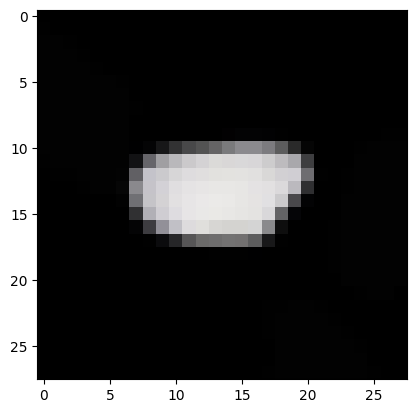

In [ ]:
import matplotlib.pyplot as plt

# TODO: Obten, mediante un iterador, una imagen y su etiqueta. Pinta la imagen y su etiqueta por pantalla
image, label = next(iter(train_dataloader))
print(f"Etiqueta: {train_dataset.classes[label[0]]}")
plt.imshow(image[0].permute(1,2,0))

In [ ]:
salida_1 = model(image)
salida_2 = nn.Softmax(dim=1)(model(image))

# TODO: Tenemos las variables salida_1 y salida_2, relaciona cuales son logits y cuales probabilidades

print(f"Logits de la imagen: {salida_1}")
print(f"Probabilidades de la imagen: {salida_2}")

Logits de la imagen: tensor([[-0.0853,  0.0077,  0.0218,  0.1104,  0.0553]],
       grad_fn=<AddmmBackward0>)
Probabilidades de la imagen: tensor([[0.1793, 0.1968, 0.1996, 0.2180, 0.2064]], grad_fn=<SoftmaxBackward0>)
